<a href="https://colab.research.google.com/github/vidakpop/Visualization-and-Regression/blob/main/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import



In [2]:
# Loading the dataset 
url='https://raw.githubusercontent.com/vidakpop/Visualization-and-Regression/main/train%20(titanic).csv'
df=pd.read_csv(url,encoding='unicode_escape')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.corr()


<ipython-input-3-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<ipython-input-4-bd263b57df3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


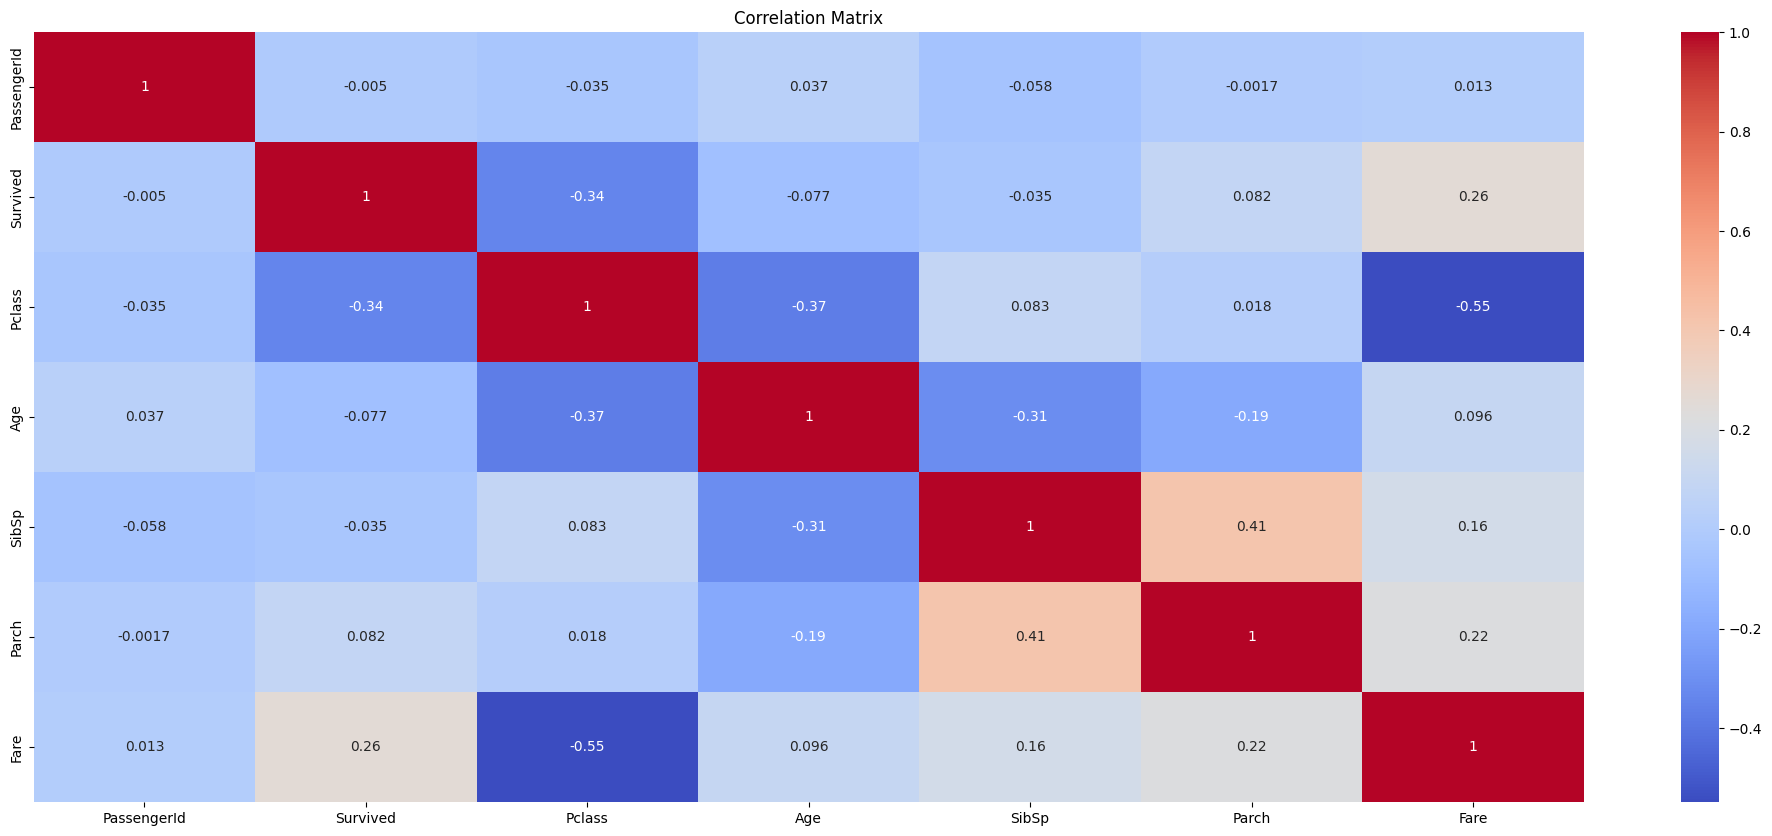

In [4]:
#Correlation Matrix
corr_matrix=df.corr()
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()


<ipython-input-5-561631497776>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df.corr()["Fare"].sort_values(ascending=False)


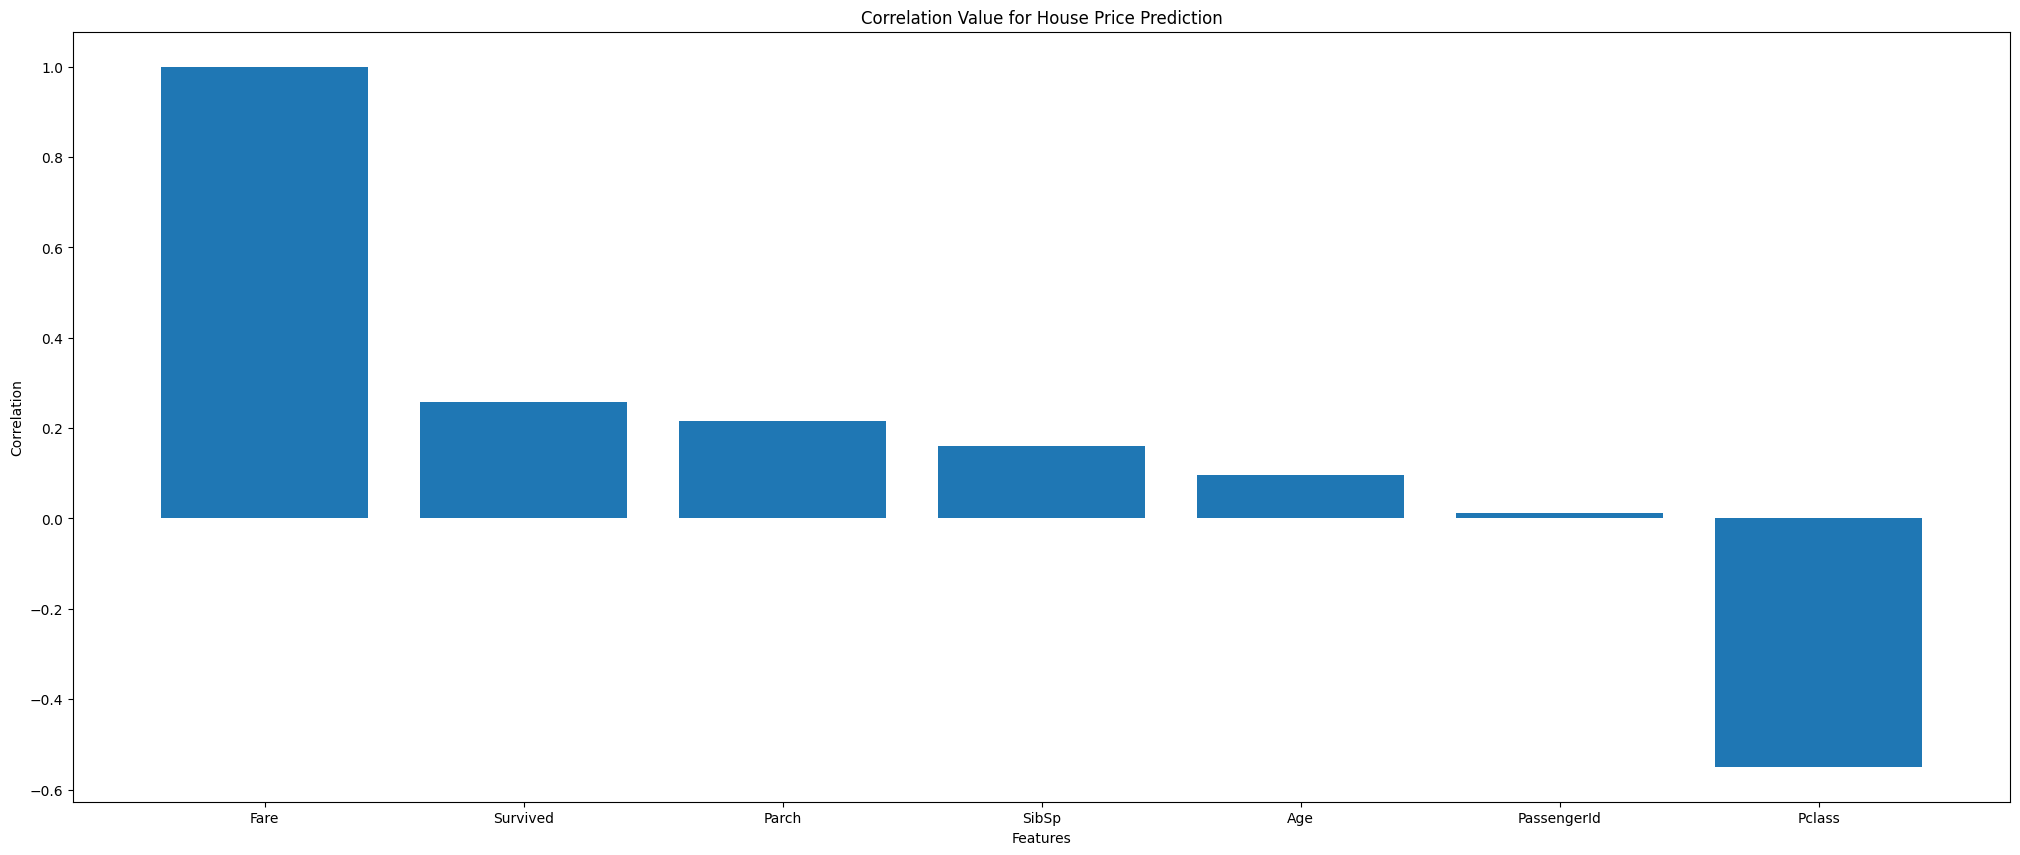

In [5]:
correlations=df.corr()["Fare"].sort_values(ascending=False)

plt.figure(figsize=(25, 10)) # Set figure size to 10x6 inches
plt.bar(correlations.index, correlations)

plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation Value for House Price Prediction")
plt.show()

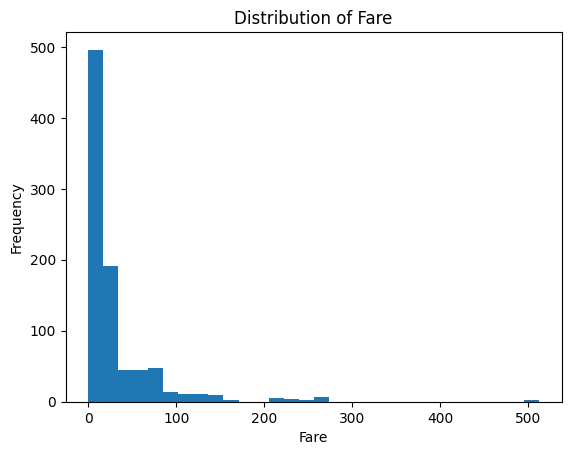

In [6]:
# Histogram of Fare
plt.hist(df['Fare'], bins=30)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.show()

In [7]:
# Calculate the mean, standard deviation, and mode
mean = df['Fare'].mean()
std_dev = df['Fare'].std()
mode = df['Fare'].mode()[0]

print("Mean: ", mean)
print("Standard deviation: ", std_dev)
print("Mode: ", mode)

Mean:  32.204207968574636
Standard deviation:  49.6934285971809
Mode:  8.05


In [8]:
# Calculate the 25th, 50th, and 75th percentiles
p25 = np.percentile(df['Fare'], 25)
p50 = np.percentile(df['Fare'], 50)
p75 = np.percentile(df['Fare'], 75)

print("25th percentile: ", p25)
print("50th percentile: ", p50)
print("75th percentile: ", p75)


25th percentile:  7.9104
50th percentile:  14.4542
75th percentile:  31.0


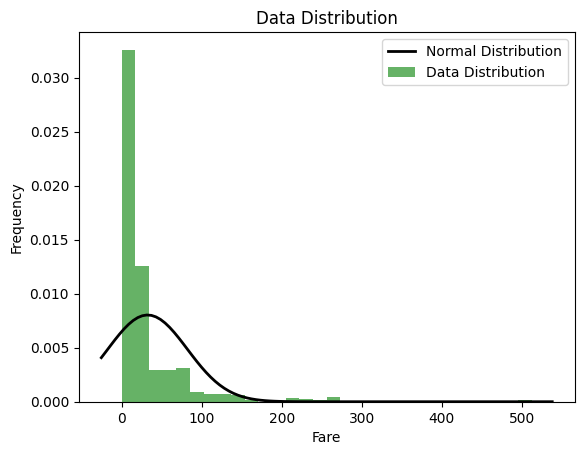

In [10]:
# Plot the data distribution and normal data distribution
plt.hist(df['Fare'], bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Data Distribution')

# Fit a normal distribution to the data
mu, std = norm.fit(df['Fare'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.legend(['Normal Distribution', 'Data Distribution'])
plt.show()



Linear Regression Evaluation Metrics:
Mean Squared Error:  1209.725402006439
Mean Absolute Error:  22.279709349862962
R-squared:  0.45734050898304945

Decision Tree Regression Evaluation Metrics:
Mean Squared Error:  1881.3019287024167
Mean Absolute Error:  18.03588050466278
R-squared:  0.15608422755643947


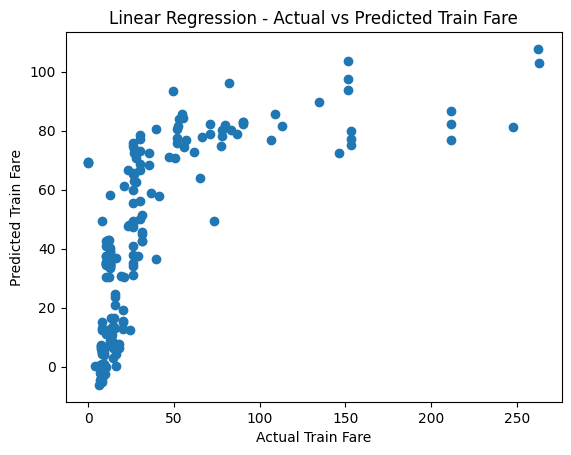

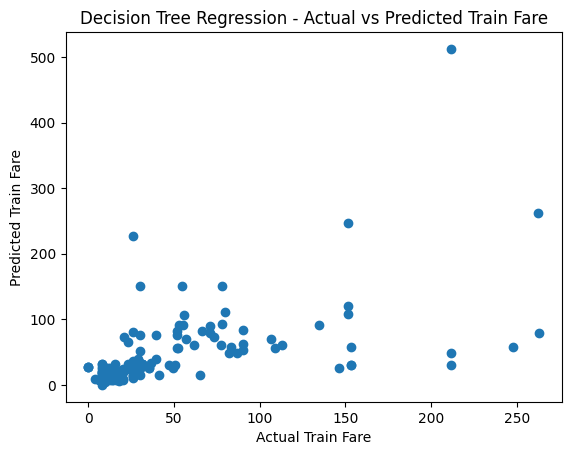

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# Split the data into features (X) and target (y)
X = df.drop('Fare', axis=1)
X = X.drop(['Sex', 'Embarked'], axis=1)
y = df['Fare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict the prices using the linear regression model
y_pred_lin = lin_reg.predict(X_test)

# Calculate the evaluation metrics for the linear regression model
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Evaluation Metrics:")
print("Mean Squared Error: ", mse_lin)
print("Mean Absolute Error: ", mae_lin)
print("R-squared: ", r2_lin)

# Fit the decision tree regression model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Predict the prices using the decision tree regression model
y_pred_tree = tree_reg.predict(X_test)

# Calculate the evaluation metrics for the decision tree regression model
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Regression Evaluation Metrics:")
print("Mean Squared Error: ", mse_tree)
print("Mean Absolute Error: ", mae_tree)
print("R-squared: ", r2_tree)

# Visualize the predicted and actual house prices using a scatter plot
plt.scatter(y_test, y_pred_lin)
plt.xlabel('Actual Train Fare')
plt.ylabel('Predicted Train Fare')
plt.title('Linear Regression - Actual vs Predicted Train Fare')
plt.show()

plt.scatter(y_test, y_pred_tree)
plt.xlabel('Actual Train Fare')
plt.ylabel('Predicted Train Fare')
plt.title('Decision Tree Regression - Actual vs Predicted Train Fare')
plt.show()

First class passengers:  216
Second class passengers:  184
Third class passengers:  491


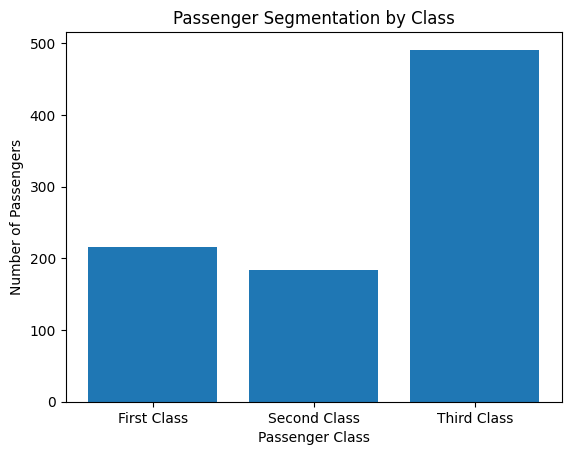

In [34]:
# Segment the dataset based on passenger class
first_class = df[df['Pclass'] == 1]
second_class = df[df['Pclass'] == 2]
third_class = df[df['Pclass'] == 3]

# Print the number of passengers in each class
print("First class passengers: ", len(first_class))
print("Second class passengers: ", len(second_class))
print("Third class passengers: ", len(third_class))

# Set the data for the bar chart
data = [len(first_class), len(second_class), len(third_class)]
classes = ['First Class', 'Second Class', 'Third Class']

# Create the bar chart
plt.bar(classes, data)

# Add labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Passenger Segmentation by Class')

# Show the plot
plt.show()


Dead passengers:  549
Survived passengers:  342


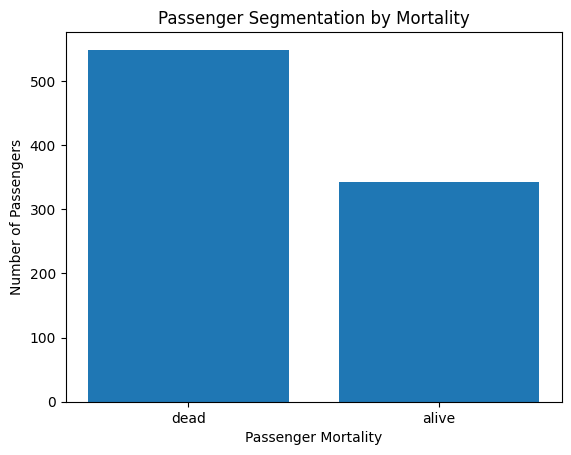

In [36]:
# Segment the dataset based on survived
dead= df[df['Survived'] == 0]
alive = df[df['Survived'] == 1]


# Print the number of passengers in each class
print("Dead passengers: ", len(dead))
print("Survived passengers: ", len(alive))

import matplotlib.pyplot as plt

# Set the data for the bar chart
data = [len(dead), len(alive)]
mortality = ['dead', 'alive']

# Create the bar chart
plt.bar(mortality, data)

# Add labels and title
plt.xlabel('Passenger Mortality')
plt.ylabel('Number of Passengers')
plt.title('Passenger Segmentation by Mortality')

# Show the plot
plt.show()
